# <center> Практика.Исследование данных HR-агенства.

## <center> Загрузка и обработка данных

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

In [2]:
data = pd.read_csv('data/ds_salaries.csv')
display(data.head(5))

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB
None


**Проверим датасет на дубликаты**

In [4]:
print('Найденные дубликаты:{}'.format(data.duplicated().sum()))

Найденные дубликаты:0


**Проверим данные на ошибки**


In [5]:
mask = (data['employee_residence'] != data['company_location']) & (data['remote_ratio'] == 0)
display(data[mask])

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
182,182,2021,MI,FT,Data Engineer,22000,EUR,26005,RO,0,US,L
208,208,2021,MI,FL,Data Engineer,20000,USD,20000,IT,0,US,L
213,213,2021,EN,FT,Big Data Engineer,435000,INR,5882,IN,0,CH,L
281,281,2021,EN,FT,Research Scientist,100000,USD,100000,JE,0,CN,L


**При отсутствии возможности удалённой работы, локация офиса и места проживания работника отличается**

In [6]:
# Удалим строки
indices_to_drop = data.loc[mask].index
data = data.drop(indices_to_drop)

**Проверим регионы компаний**

In [7]:
print(data['company_location'].value_counts())

company_location
US    353
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
TR      3
DK      3
AU      3
IT      2
CZ      2
RU      2
NG      2
SI      2
BE      2
VN      1
AS      1
KE      1
MY      1
DZ      1
CO      1
IE      1
EE      1
MD      1
SG      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
CN      1
NZ      1
HU      1
HN      1
CH      1
Name: count, dtype: int64


**Преимущественно данные взяты из US региона и при анализе они будут преобладающими**

**Очистим таблицу от лишней информации:**
- Столбец Unnamed: 0 так как порядковый номер не нужен
- Столбцы salary и salary_currency так как они дублируются столбцом salary_in_usd
- Столбцы employee_residence и company_location так как данные взяты преимущественно из одного региона

In [8]:
data = data.drop(['Unnamed: 0','salary','salary_currency', 'employee_residence', 'company_location'], axis=1)

**Изменим тип данных столбцу remote_ratio для удобства**

In [9]:
data['remote_ratio'] = data['remote_ratio'].replace({
    0: 'office',
    50: 'hybrid',
    100: 'remote'
})

In [10]:
display(data.head(5))

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size
0,2020,MI,FT,Data Scientist,79833,office,L
1,2020,SE,FT,Machine Learning Scientist,260000,office,S
2,2020,SE,FT,Big Data Engineer,109024,hybrid,M
3,2020,MI,FT,Product Data Analyst,20000,office,S
4,2020,SE,FT,Machine Learning Engineer,150000,hybrid,L


In [11]:
# Разобъём таблицу на 3 года для дальнейшего анализа

data_2020 = data[data['work_year'] == 2020]
data_2021 = data[data['work_year'] == 2021]
data_2022 = data[data['work_year'] == 2022]

## <center> Визуальный анализ данных

**Построим гистограммы и ящики для зарплат по каждому году**

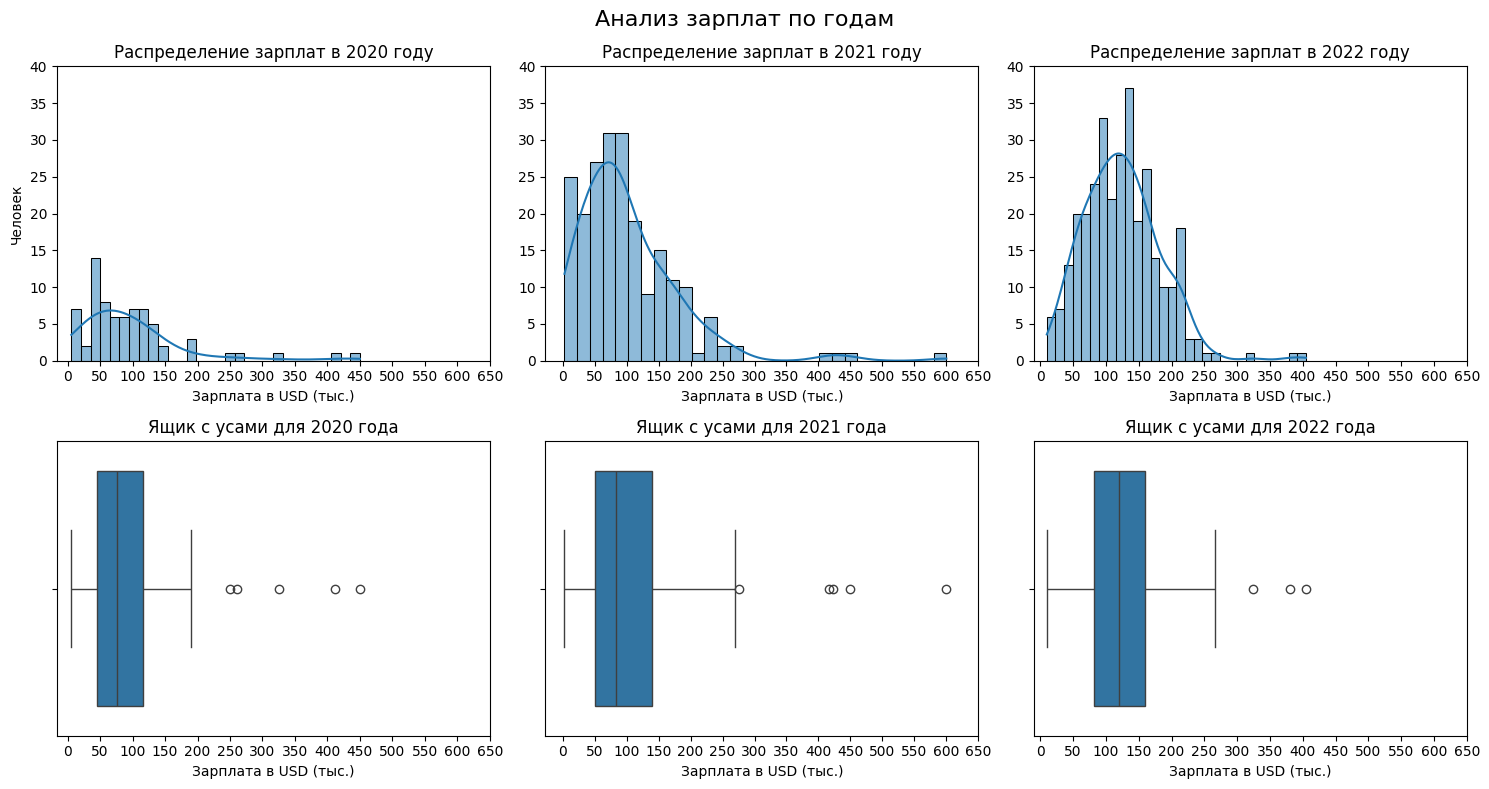

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Гистограммы
sns.histplot(data_2020['salary_in_usd'], bins=30, ax=axes[0,0], kde=True)
axes[0,0].set_ylabel('Человек')

sns.histplot(data_2021['salary_in_usd'], bins=30, ax=axes[0,1], kde=True)
axes[0,1].set_ylabel('')

sns.histplot(data_2022['salary_in_usd'], bins=30, ax=axes[0,2], kde=True)
axes[0,2].set_ylabel('')

# Ящики с усами
sns.boxplot(x=data_2020['salary_in_usd'], ax=axes[1,0], orient='h')

sns.boxplot(x=data_2021['salary_in_usd'], ax=axes[1,1], orient='h')

sns.boxplot(x=data_2022['salary_in_usd'], ax=axes[1,2], orient='h')

# Заголовки и подписи
years = [2020, 2021, 2022]
for i, year in enumerate(years):
    axes[0,i].set_title(f'Распределение зарплат в {year} году')
    axes[0,i].set_xlabel('Зарплата в USD (тыс.)')
    axes[0,i].set_ylim(0, 40)
    axes[0,i].set_xticks(range(0, 700000, 50000))
    axes[0,i].set_xticklabels([f'{int(x/1000)}' for x in axes[0,i].get_xticks()])
    
    axes[1,i].set_title(f'Ящик с усами для {year} года')
    axes[1,i].set_xlabel('Зарплата в USD (тыс.)')
    axes[1,i].set_xticks(range(0, 700000, 50000))
    axes[1,i].set_xticklabels([f'{int(x/1000)}' for x in axes[0,i].get_xticks()])

plt.suptitle('Анализ зарплат по годам', fontsize=16)

plt.tight_layout()
plt.show()

In [13]:
usd_df = pd.concat([
    data_2020['salary_in_usd'].describe().round(2).rename('2020'),
    data_2021['salary_in_usd'].describe().round(2).rename('2021'),
    data_2022['salary_in_usd'].describe().round(2).rename('2022')
], axis=1)

display(usd_df)

,2020,2021,2022
count,72.0,213.00,318.00
mean,95813.0,101015.90,124522.01
std,82831.8,80365.97,58183.65
min,5707.0,2859.00,10000.00
25%,45724.5,50000.00,81666.00
50%,75544.0,82744.00,120000.00
75%,115526.0,140000.00,160000.00
max,450000.0,600000.00,405000.00


**В заданном промежутке прослеживается постоянный рост зарплат и увеличение количества вакансий**

**Визуализация связи зарплаты и опыта**

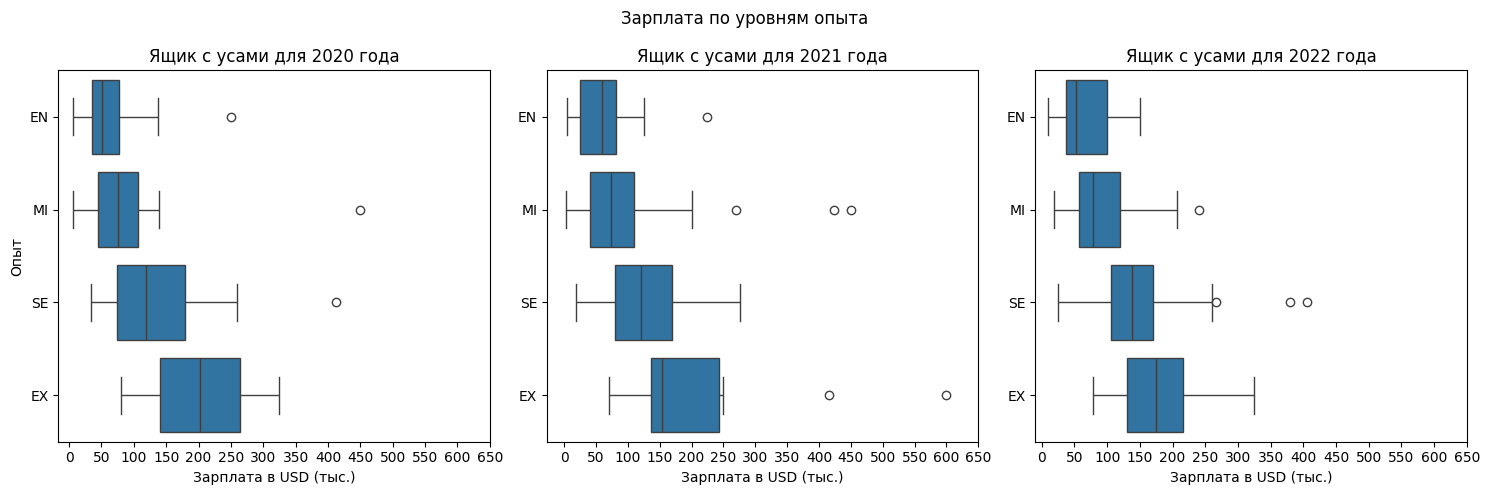

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

exp_lst = ['EN', 'MI', 'SE', 'EX']

sns.boxplot(data_2020, x='salary_in_usd', y='experience_level', ax=axes[0], order=exp_lst)
axes[0].set(xlabel='Зарплата', ylabel='Опыт')
sns.boxplot(data_2021, x='salary_in_usd', y='experience_level', ax=axes[1], order=exp_lst)
axes[1].set(xlabel='', ylabel='')
sns.boxplot(data_2022, x='salary_in_usd', y='experience_level', ax=axes[2], order=exp_lst)
axes[2].set(xlabel='', ylabel='')

years = [2020, 2021, 2022]
for i, year in enumerate(years):
    axes[i].set_title(f'Ящик с усами для {year} года')
    axes[i].set_xlabel('Зарплата в USD (тыс.)')
    axes[i].set_xticks(range(0, 700000, 50000))
    axes[i].set_xticklabels([f'{int(x/1000)}' for x in axes[i].get_xticks()])

plt.suptitle('Зарплата по уровням опыта')

plt.tight_layout()
plt.show()

In [15]:
exp_df = pd.concat([
    data_2020.groupby('experience_level')['salary_in_usd'].describe().round(2).T.add_suffix('_2020'),
    data_2021.groupby('experience_level')['salary_in_usd'].describe().round(2).T.add_suffix('_2021'),
    data_2022.groupby('experience_level')['salary_in_usd'].describe().round(2).T.add_suffix('_2022')
], axis=1)

display(exp_df)


experience_level,EN_2020,EX_2020,MI_2020,SE_2020,EN_2021,EX_2021,MI_2021,SE_2021,EN_2022,EX_2022,MI_2022,SE_2022
count,20.00,2.00,32.00,18.00,45.00,11.00,88.00,69.00,21.00,13.00,91.00,193.0
mean,63648.60,202416.50,85950.06,137240.50,59374.80,223752.73,86910.26,126596.19,65423.43,178313.85,91193.96,143043.4
std,56194.74,173359.25,75883.81,91121.24,41016.47,157541.20,74576.26,61449.31,40161.34,65875.08,46387.83,51886.6
min,5707.00,79833.00,6072.00,33511.00,4000.00,69741.00,2859.00,18907.00,10000.00,79039.00,18442.00,25000.0
25%,35354.25,141124.75,45152.75,74130.25,24823.00,135936.00,40151.25,79197.00,37300.00,130000.00,56478.50,106260.0
50%,50294.50,202416.50,75544.00,118552.00,59102.00,153667.00,73500.00,120000.00,52396.00,175000.00,78526.00,138600.0
75%,76750.00,263708.25,107000.00,178500.00,81000.00,242500.00,110000.00,170000.00,100000.00,216000.00,120000.00,170000.0
max,250000.00,325000.00,450000.00,412000.00,225000.00,600000.00,450000.00,276000.00,150000.00,324000.00,241000.00,405000.0


**Чем более опытен сотрудник, тем более выше уровень зарплат. К тому же виден общий рост зарплат у всех групп в течении данного периода**

**Визуализация Формата работы и размера компании**

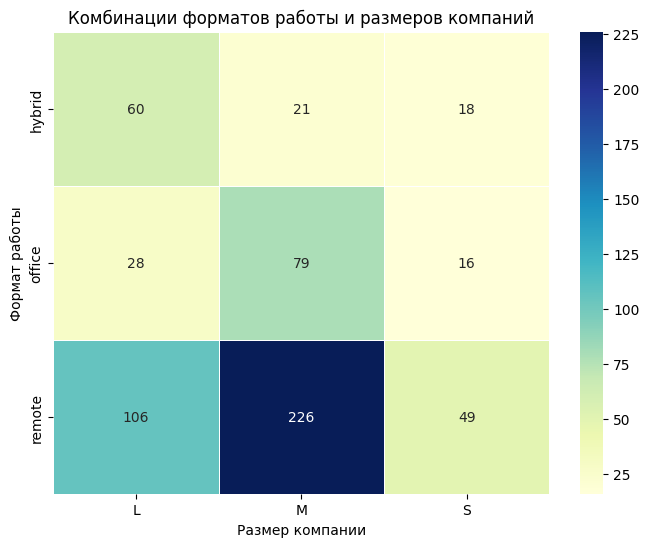

In [16]:
cross_tab = pd.crosstab(
    index=data['remote_ratio'], 
    columns=data['company_size'], 
    rownames=['Формат работы'],
    colnames=['Размер компании']
)

plt.figure(figsize=(8, 6))

sns.heatmap(
    cross_tab, 
    annot=True, 
    fmt='d', 
    cmap='YlGnBu',
    linewidths=0.5
)
plt.title('Комбинации форматов работы и размеров компаний')
plt.show()

**Удалённый формат работы оказался самым популярным. Притом средняя компания нанимает больше сотрудников чем большая**

**Визуализируем распределение типа занятости**

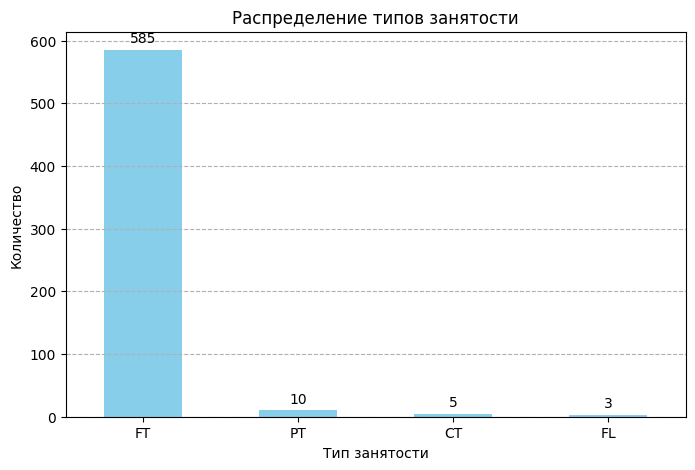

In [17]:

employment_counts = data['employment_type'].value_counts()

plt.figure(figsize=(8, 5))

employment_counts.plot(kind='bar', color='skyblue')

plt.title('Распределение типов занятости')
plt.xlabel('Тип занятости')
plt.xticks(rotation=0)
plt.ylabel('Количество')
plt.bar_label(plt.gca().containers[0], fmt='%d', padding=3)
plt.grid(axis='y', linestyle='--')
plt.show()

**Полный рабочий день самый популярный формат работы, в данной выборке, остальные форматы в сумме занимают около 3% от общего числа**

## <center> Статистический анализ данных

In [18]:
# задаём уровень значимости
alpha = 0.05 
print("Уровень значимости alpha = {:.2f}".format(alpha))

Уровень значимости alpha = 0.05


### <center> Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

**Нулевая гипотеза: зарплата не увеличивается или становится меньше**
$$ H_0 : μ_1 <= μ_2 <= μ_3$$
**Альтернативная гипотиза: каждый год зарплата увеличивается**
$$ H_1 : μ_1 > μ_2 > μ_3$$

**Проверим распределение и выберем метод оценки**

In [19]:
data_money_2020 = data_2020['salary_in_usd']
data_money_2021 = data_2021['salary_in_usd']
data_money_2022 = data_2022['salary_in_usd']

_, p_2020 = stats.shapiro(data_money_2020)
_, p_2021 = stats.shapiro(data_money_2021)
_, p_2022 = stats.shapiro(data_money_2022)

print(f'P для 2020 года: {p_2020:.2f}')
print(f'P для 2021 года: {p_2021:.2f}')
print(f'P для 2022 года: {p_2022:.2f}')

P для 2020 года: 0.00
P для 2021 года: 0.00
P для 2022 года: 0.00


**Распределение отличается от нормального и количество рассматриваемых групп 3, используем критерий Фридмана**

In [20]:
# Ограничим выборки до минимальной длины, чтобы избежать ошибок в тесте Фридмана
min_length = min(len(data_money_2020), len(data_money_2021), len(data_money_2022))

data_money_2020 = data_money_2020[:min_length]
data_money_2021 = data_money_2021[:min_length]
data_money_2022 = data_money_2022[:min_length]
 
_, p = stats.friedmanchisquare(data_money_2020, data_money_2021, data_money_2022)

print('p-value = {:.2f}'.format(p))

if p < alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.00
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


**При анализе данной выборки можно судить о увеличении заработной платы в течении заданного срока**

### <center>Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?

**Нулевая гипотеза: Зарплаты DS и DE не различаются статистически значимо.**
$$ H_0 : μ_1 = μ_2$$
**Альтернативная гипотиза: Зарплаты DS и DE различаются.**
$$ H_1 : μ_1 != μ_2$$

In [21]:
data_ds_de = data_2022[data_2022['job_title'].isin(['Data Scientist', 'Data Engineer'])]

data_ds = data_2022[data_2022['job_title'] == 'Data Scientist']
data_de = data_2022[data_2022['job_title'] == 'Data Engineer']

_, p_ds = stats.shapiro(data_ds['salary_in_usd'])
_, p_de = stats.shapiro(data_de['salary_in_usd'])

print(f"p-value (DS): {p_ds:.2f}")
print(f"p-value (DE): {p_de:.2f}")

p-value (DS): 0.33
p-value (DE): 0.01


**Признак DS распределён нормально, а признак DE нет. Применяем Непараметрический U-тест Манна-Уитни**

In [22]:
_, p_value = stats.mannwhitneyu(data_ds['salary_in_usd'], data_de['salary_in_usd'])
print(f"p-value: {p_value:.2f}")

if p_value < alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value: 0.15
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Нельзя отвергать нулевую гипотезу. Нет оснований заявлять что зарплаты отличаются.**

### <center> Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

**Нулевая гипотеза: Зарплаты в фирмах разных размеров одинаковые.**
$$ H_0 : μ_1 = μ_2$$
**Альтернативная гипотиза: Зарплаты в фирмах разных размеров различаются.**
$$ H_1 : μ_1 != μ_2$$

In [23]:
money_s = data[data['company_size'] == 'S']['salary_in_usd']
money_m = data[data['company_size'] == 'M']['salary_in_usd']
money_l = data[data['company_size'] == 'L']['salary_in_usd']

_, p_s = stats.shapiro(money_s)
_, p_m = stats.shapiro(money_m)
_, p_l = stats.shapiro(money_l)

print(f"p-value (S): {p_s:.2f}")
print(f"p-value (M): {p_m:.2f}")
print(f"p-value (L): {p_l:.2f}")

p-value (S): 0.00
p-value (M): 0.00
p-value (L): 0.00


**Признак не распределён по нормальному закону, используем критерий Краскела-Уоллиса**

In [24]:
_, p = stats.kruskal(money_s, money_m, money_l)
print(f'p-value: {p:.2f}')

if p < alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value: 0.00
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


**Зарплаты в фирмах разного размера отличаются**

### <center> Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

**Нулевая гипотеза: Связи должностей и размером компаний есть.**
$$ H_0 : μ_1 = μ_2$$
**Альтернативная гипотиза: Связи должностей и размером компаний нет.**
$$ H_1 : μ_1 != μ_2$$


**Создадим промежуточную таблицу**

In [25]:
subset = data[data['job_title'].isin(['Data Scientist', 'Data Engineer'])]

contingency_table = pd.crosstab(subset['company_size'], subset['job_title'])

display(contingency_table)

job_title,Data Engineer,Data Scientist
company_size,,
L,35,45
M,89,77
S,6,21


**Проверим зависимость с помощью теста хи квадрат**

In [26]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"p-value = {p:.2f}")

if p < alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.01
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


**Нет статистически значимой связи между размером компании и наличием должностей Data Scientist и Data Engineer. Другими словами, размер компании не влияет на то, появляются ли в ней эти должности.**

## <center> Дополнительное исследование

### <center> Есть ли различия в зарплате в компаниях разных размеров ?

**Нулевая гипотеза: Различий в зарплате нет.**
$$ H_0 : μ_1 = μ_2 = μ_3$$
**Альтернативная гипотиза: Различия в зарплате есть.**
$$ H_1 : μ_1 != μ_2 != μ_3$$



In [27]:
money_s = data[data['company_size'] == 'S']['salary_in_usd']
money_m = data[data['company_size'] == 'M']['salary_in_usd']
money_l = data[data['company_size'] == 'L']['salary_in_usd']

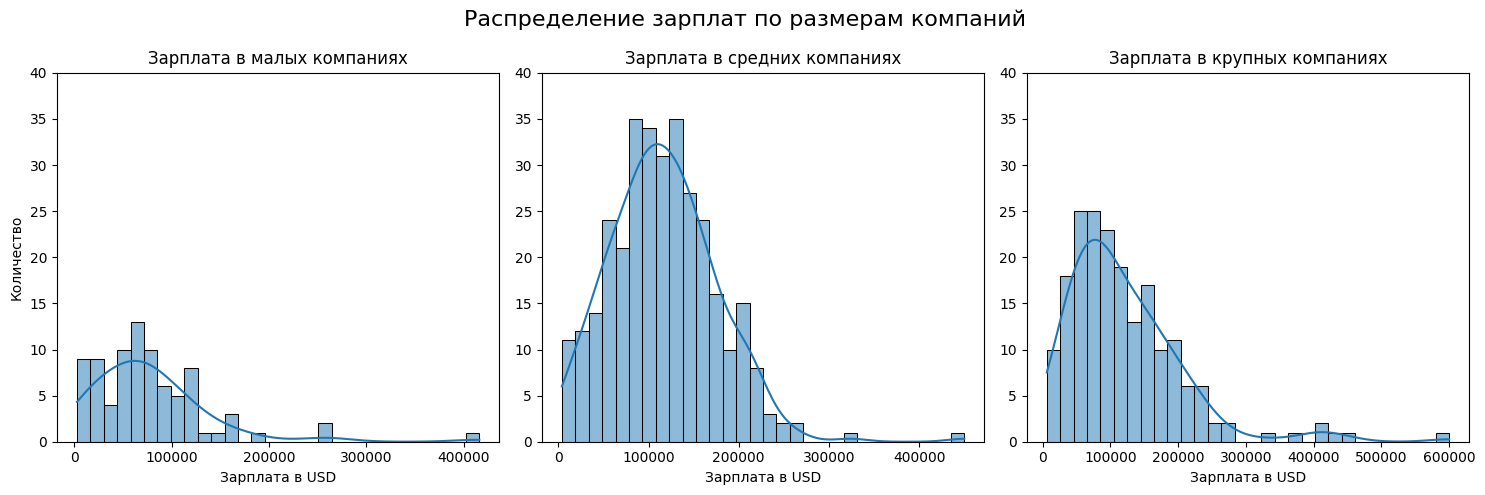

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(money_s, bins=30, ax=axes[0], kde=True)
axes[0].set_title('Зарплата в малых компаниях')
axes[0].set_ylim(0, 40)
axes[0].set_ylabel('Количество')
axes[0].set_xlabel('Зарплата в USD')

sns.histplot(money_m, bins=30, ax=axes[1], kde=True)
axes[1].set_title('Зарплата в средних компаниях')
axes[1].set_ylim(0, 40)
axes[1].set_ylabel('')
axes[1].set_xlabel('Зарплата в USD')

sns.histplot(money_l, bins=30, ax=axes[2], kde=True)
axes[2].set_title('Зарплата в крупных компаниях')
axes[2].set_ylim(0, 40)
axes[2].set_ylabel('')
axes[2].set_xlabel('Зарплата в USD')

plt.suptitle('Распределение зарплат по размерам компаний', fontsize=16)

plt.tight_layout()
plt.show()

In [29]:
_, p_s = stats.shapiro(money_s)
_, p_m = stats.shapiro(money_m)
_, p_l = stats.shapiro(money_l)

print(f"p-value (S): {p_s:.2f}")
print(f"p-value (M): {p_m:.2f}")
print(f"p-value (L): {p_l:.2f}")

p-value (S): 0.00
p-value (M): 0.00
p-value (L): 0.00


**Признак не распределён по нормальному закону, используем Тест Манна-Уитни**

In [30]:
group_data = {
    'S': money_s,
    'M': money_m,
    'L': money_l
}

pairs = [('S', 'M'), ('S', 'L'), ('M', 'L')]
p_values = []

for group1, group2 in pairs:
    data1 = group_data[group1]
    data2 = group_data[group2]

    _, p = stats.mannwhitneyu(data1, data2, alternative='two-sided')
    p_values.append(p)
    print('p-values {} vs {}: {:.4f}'.format(group1, group2, p))
    
    if p < alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-values S vs M: 0.0000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.
p-values S vs L: 0.0000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.
p-values M vs L: 0.3349
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Из теста можно выделить что различия в зарплате между средней и большой компанией менее выражены, чем в сравнении с маленькой**

### <center> Меняется ли количество компаний разного размра в 2020 в 2021 и 2022 годах ?

**Нулевая гипотеза: Количество не меняется.**
$$ H_0 : μ_1 = μ_2 = μ_3$$
**Альтернативная гипотиза: Количество отличается.**
$$ H_1 : μ_1 != μ_2 != μ_3$$

In [31]:
# Создадим промежуточную таблицу с годом и количеством компаний
company_counts = data.groupby(['work_year', 'company_size']).size().unstack().fillna(0)
display(company_counts.head())

company_size,L,M,S
work_year,,,
2020,33,14,25
2021,115,53,45
2022,46,259,13


**Визуализация данных**

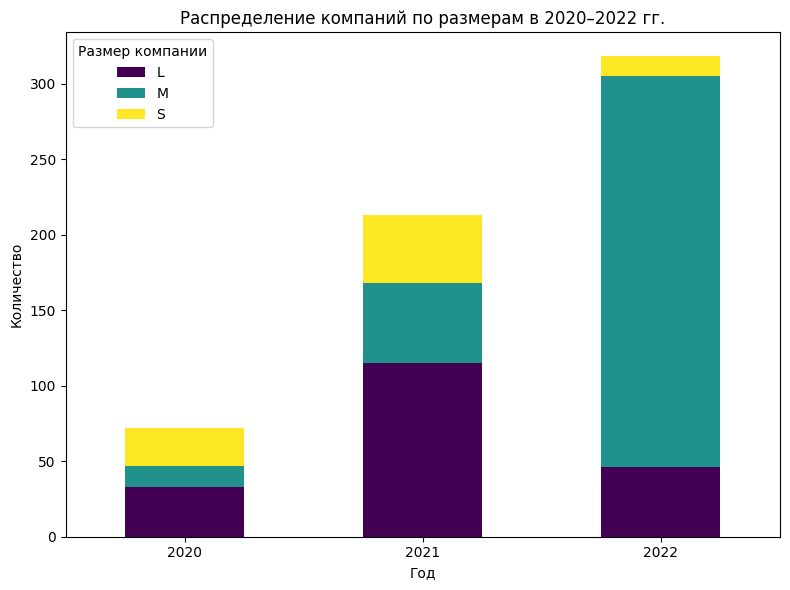

In [32]:
company_counts.plot(kind='bar', stacked=True, figsize=(8,6), colormap='viridis')

plt.title('Распределение компаний по размерам в 2020–2022 гг.')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.legend(title='Размер компании')

plt.tight_layout()
plt.show()

**Используем тест хи квадрат**

In [33]:
chi2, p, dof, expected = stats.chi2_contingency(company_counts)

print(f"p-value: {p:.2f}")

if p < alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value: 0.00
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


**В выборке прослеживается рост количества компаний, но в 22 году увеличилось число средних компаний и уменьшилось больших. Возможно это связано с кризисом и реструкторизацией больших фирм на меньшие количество малых компаниий тоже стало меньше скорее всего они перешли в разряд средних**

## <center> Вывод

**В зарплатах DS прослеживается постоянный рост и увеличение количество вакансий. Также установлено, что уровень зарплаты напрямую зависит от опыта: чем больше опыт, тем выше заработная плата. Удалённая работа оказалась наиболее популярным форматом, а зарплаты в средних компаниях выше, чем в крупных, и именно в средние компании набирают больше сотрудников. Полная занятость преобладает среди типов занятости. При этом размер компании не оказывает значимого влияния на наличие должностей Data Scientist и Data Engineer. В 22 году значительно увеличилось количество средних компаний, а количество крупных уменьшилось. Возможно, это связано с кризисом, из-за которого крупные компании начали делиться на более мелкие структуры, что привело к росту числа вакансий.**